##### Zadanie: analiza danych
W tym module analizowaliśmy bazę danych z informacjami dotyczącymi pracowników pewnego amerykańskiego przedsiębiorstwa. Główną wagę przywiązaliśmy do stawki wynagrodzenia, jest tam jednak wiele innych obszarów, którym moglibyśmy się przyjrzeć. Jako zadanie zastanów się i postaraj się odpowiedzieć na następujące pytania:

1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?
2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?
3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?
Użyj bazy danych znajdującej się tutaj. Przygotuj odpowiednie zestawienia i wizualizacje, a następnie sformułuj swoją opinię na temat wyżej wymienionych kwestii.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
import gmplot
from IPython.display import IFrame

In [146]:
df = pd.read_csv('HRDataset.csv')

In [147]:
df.drop(['LastPerformanceReview_Date', "DaysLateLast30"], axis=1, inplace=True)
df.dropna(thresh=2, inplace=True)
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m/%d/%Y')

In [148]:
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']
    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

df['Seniority'] = df.apply(lambda row: count_seniority(row), axis=1)

##### 1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

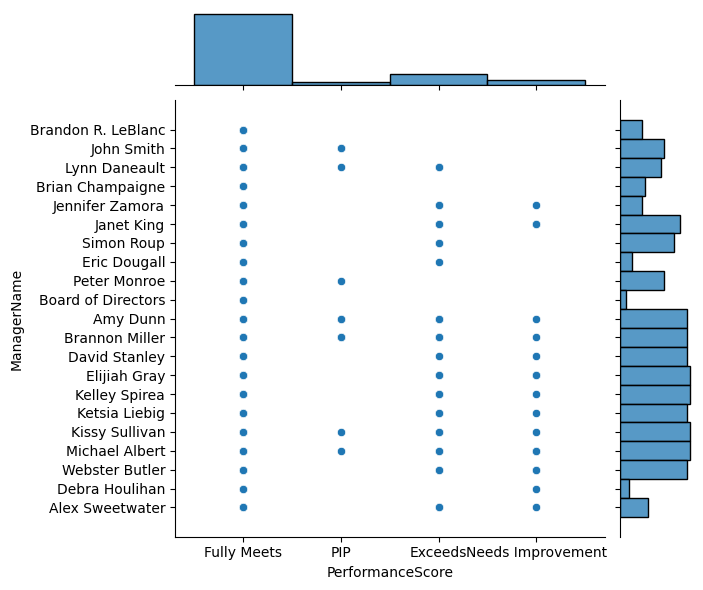

In [149]:
sns.jointplot(x='PerformanceScore', y='ManagerName', data=df)

<AxesSubplot: xlabel='PerformanceScore', ylabel='ManagerID'>

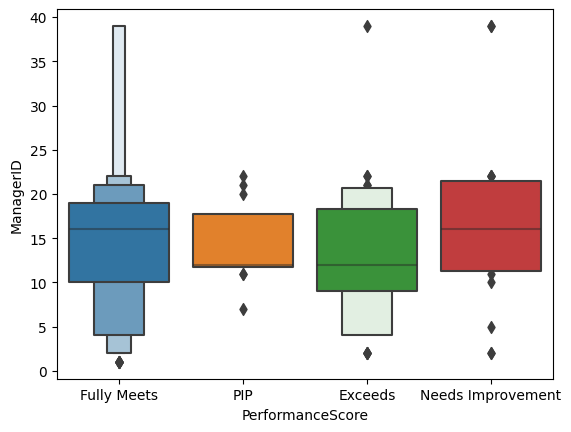

In [150]:
sns.boxenplot(x='PerformanceScore', y='ManagerID', data=df)

Według powyższego wykresu, wydawać by się mogło, że managerowie o ID między 3 i 11 oraz między 22 i 39 mają najwięcej pracowników którzy są bardzo wydajni. Jednak należałoby zbadać również staż pracy pracownika, gdyż dwie ostatnie grupy mogą być po prostu nowymi praconikami, którzy dopiero zdobywają wiedzę i doświadczenie.

<AxesSubplot: xlabel='PerformanceScore', ylabel='Seniority'>

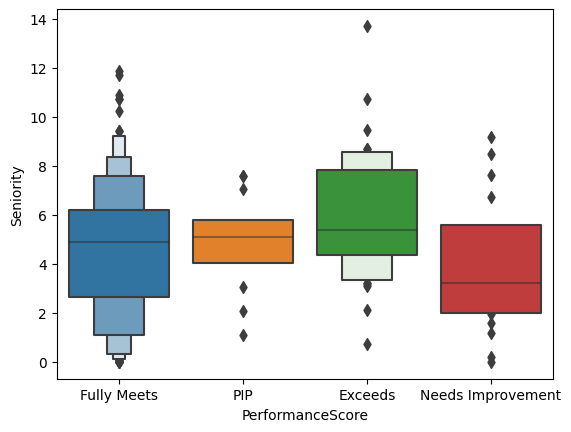

In [151]:
sns.boxenplot(x='PerformanceScore', y='Seniority', data=df)

Po analizie wydajności i stażu pracy, potwierdza się poprzednia hipoteza. Niepokojące jest zatem to, że procownicy ze stażem większym niż 2 lata a mneijszym niż 6, wymagają poleszenia lub nawet planu polepszenia wydajności. Nie ma jednak menagera, który nie miałby conajmniej 1 wydajnego pracownika.

##### 2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

<AxesSubplot: xlabel='Seniority', ylabel='RecruitmentSource'>

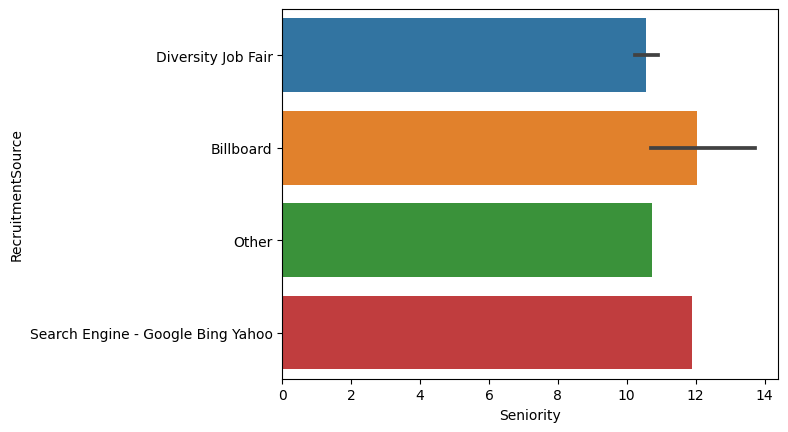

In [152]:
sns.barplot(x='Seniority', y='RecruitmentSource', data=df[(df['Seniority']>=10)])

<AxesSubplot: xlabel='Seniority', ylabel='RecruitmentSource'>

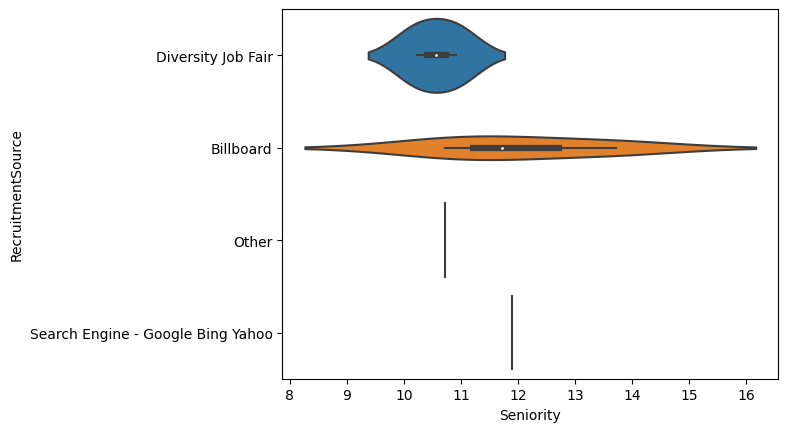

In [153]:
sns.violinplot(x='Seniority', y='RecruitmentSource', data=df[(df['Seniority']>=10)])

Jeżeli zależy nam na jak najdłuższym stażu pracowników (minimum 10 lat), to najlpszym żródłem ich pozyskiwania są "Diversity Job Fair", "Billboard" i "Search Engine - Google Bing Yahoo"

In [154]:
# nie wiem, czy odpowiedź ma być pisemnie czy w kodzie, więc zorbiłam tez poniższe:
data=df[(df['Seniority']>=10)]
data=data.groupby('RecruitmentSource').agg({'Seniority':'count'})
data.reset_index(inplace=True)
data.set_index('RecruitmentSource', inplace=True)
list=[]
def lista(data):
    for i in range(0,4):
        list.append(data.index[i])
    print(f'Jeżeli zależy nam na jak najdłuższym stażu pracowników (minimum 10 lat), to najlpszym żródłem ich pozyskiwania są: {list}.')
lista(data)
# lub bez ładnego wyglądu
print(f'Jeżeli zależy nam na jak najdłuższym stażu pracowników (minimum 10 lat), to najlpszym żródłem ich pozyskiwania są: {data.index[0:10]}.')

Jeżeli zależy nam na jak najdłuższym stażu pracowników (minimum 10 lat), to najlpszym żródłem ich pozyskiwania są: ['Billboard', 'Diversity Job Fair', 'Other', 'Search Engine - Google Bing Yahoo'].
Jeżeli zależy nam na jak najdłuższym stażu pracowników (minimum 10 lat), to najlpszym żródłem ich pozyskiwania są: Index(['Billboard', 'Diversity Job Fair', 'Other',
       'Search Engine - Google Bing Yahoo'],
      dtype='object', name='RecruitmentSource').


##### 3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

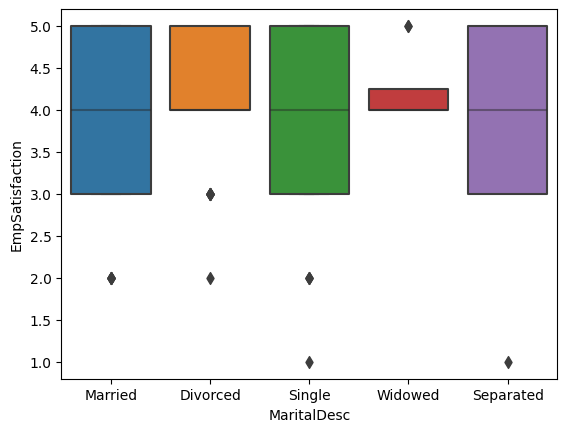

In [155]:
sns.boxenplot(x='MaritalDesc', y='EmpSatisfaction', data=df)

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

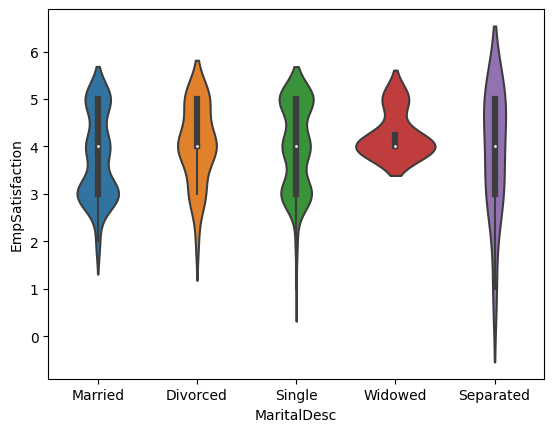

In [156]:
sns.violinplot(x='MaritalDesc', y='EmpSatisfaction', data=df)

Stan sywilny pracownika ogólnie nie wpływa na zadowolenie z pracy. Nawet owdowiali pracowniczy są na podbnym poziomie co reszta zatrudnionych. 

##### 4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

<AxesSubplot: >

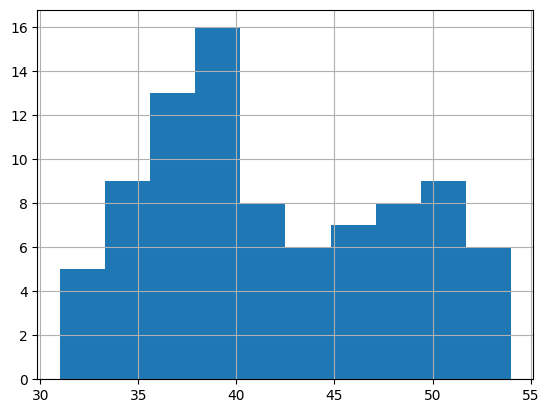

In [157]:
def count_birth(row):
    if pd.isnull(row['DOB']):
        birth_date = dt.datetime(2022,12,13)
    else:
        birth_date = row['DOB']
    return (dt.datetime(2022,12,13) - birth_date)/np.timedelta64(1,'Y')
dfb=df
dfb['YearsOld'] = dfb.apply(lambda row: count_birth(row), axis=1).round(0)
dfb=dfb[(dfb['DateofTermination'].isnull()==False)&(dfb['YearsOld']>0)]
dfb['YearsOld'].hist()

##### 5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

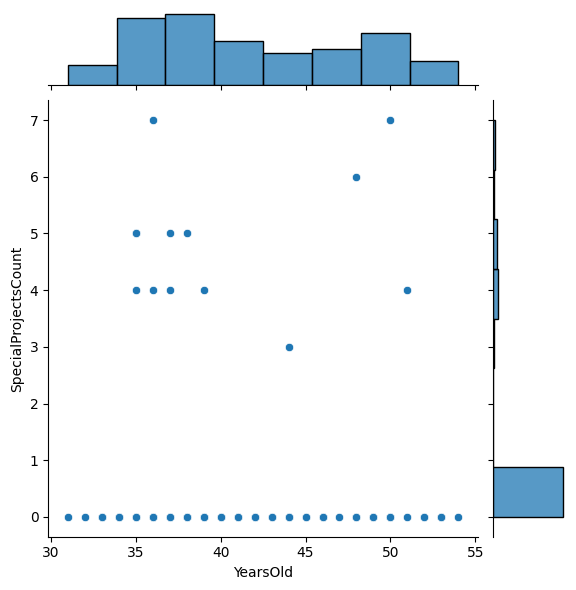

In [158]:
sns.jointplot(x='YearsOld', y='SpecialProjectsCount', data=dfb)

Starsi pracownicy nie pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy.